In [1]:
import pandas as pd 
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel(r'C:\Users\25372\Desktop\data2.xlsx')
df['ds']=pd.to_datetime(df['ds'])
df['cap']=3500
# model=Prophet()
model=Prophet(
    growth='logistic',
    seasonality_mode='additive',
    daily_seasonality = True,
    weekly_seasonality=3
                            )#logistic linear
model.fit(df) 
future = model.make_future_dataframe(periods=8, freq='W')
future['cap']=3500
future['floor']=0
forecast = model.predict(future)

In [5]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8)

,ds,yhat,yhat_lower,yhat_upper
1203,2022-12-15,1730.641370,1587.640791,1878.697786
1204,2022-12-16,1735.056569,1600.431360,1889.071985
1205,2022-12-19,1736.443810,1589.251865,1875.101135
1206,2022-12-31,1771.932777,1626.442956,1923.445510
1207,2023-12-31,1601.848570,1359.765414,1817.517745
1208,2024-12-31,1402.471836,946.634700,1894.037230
1209,2025-12-31,1232.318248,509.027624,2061.278016
1210,2026-12-31,1072.175865,210.292253,2289.201394


In [48]:
# type(forecast)

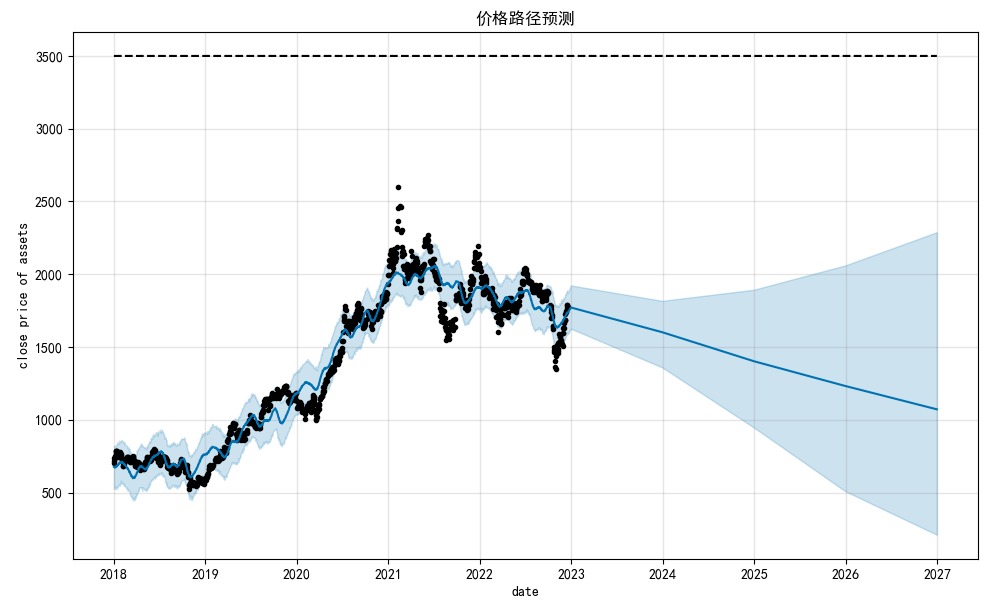

In [6]:
model.plot(forecast)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.title('价格路径预测')
plt.xlabel('date')
plt.ylabel('close price of assets')
plt.show()

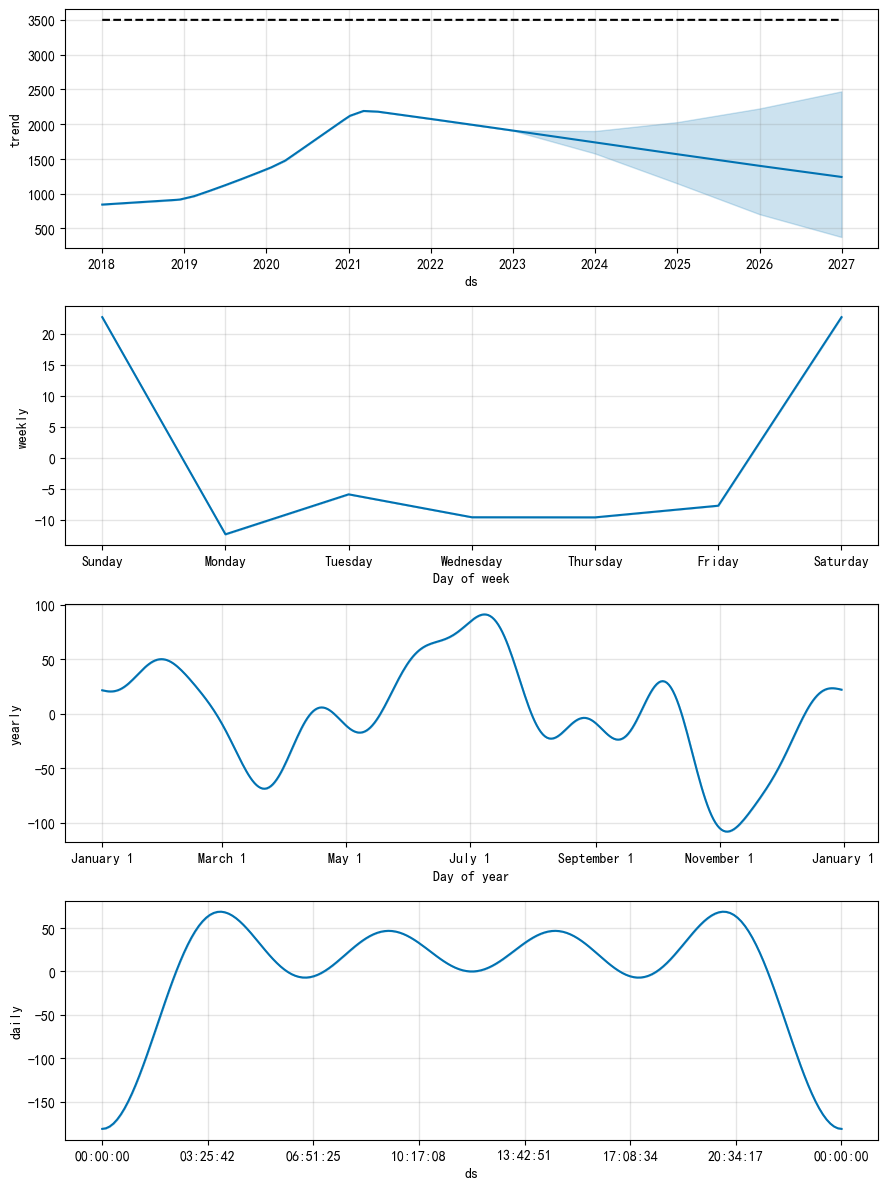

In [7]:
model.plot_components(forecast)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.show()